In [1]:
#https://www.kaggle.com/datasets/arjuntejaswi/plant-village

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='PlantVillage',
    batch_size=32,#one batch is 32 images
    image_size=(256, 256),
    shuffle=True,#randomly select images
)
#used to load images from a directory structure into a TensorFlow tf.data.Dataset object, where each element is a tensor representing a batch of images and their corresponding labels.

Found 2152 files belonging to 3 classes.


In [4]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)
#we have 68 batches containing 32 images each

68

(32, 256, 256, 3)
(32,)


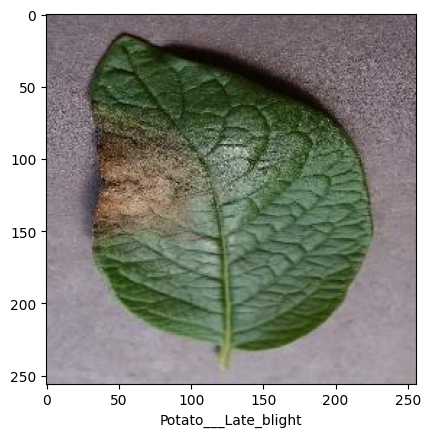

In [6]:
for image_batch , label_batch in dataset.take(1): #create a new dataset object from the first batch
    print(image_batch.shape)
    print(label_batch.shape)
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.xlabel(f'{dataset.class_names[label_batch[0]]}')

In [7]:
# 80% for training and 20% for test 
train_dataset=dataset.take(54)
test_dataset=dataset.skip(54)
print(len(train_dataset) , len(test_dataset))

54 14


In [8]:
# 10% for cv set and 10% for test dataset
test_dataset_new=test_dataset.take(7)
cv_dataset=test_dataset.skip(7)
print(len(test_dataset_new),len(cv_dataset))

7 7


In [9]:
from keras import Sequential
from keras.layers import Resizing, Rescaling, RandomRotation, RandomFlip

#preprocessing Pipeline

resize_and_rescale=Sequential([
    Resizing(256,256),
    Rescaling(1.0/255) #normalizing the dataset
])

In [10]:
#data augmentation pipeline
data_augmentation=Sequential([
    RandomFlip('horizontal_and_vertical'),
    RandomRotation(0.2)
])

#The input to this pipeline should be a 4D tensor of images with shape: (batch_size, height, width, channels)

In [11]:

from keras import layers
model = Sequential([
    resize_and_rescale,
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(3, activation='softmax'),
])

In [12]:
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
history=model.fit(train_dataset,epochs=20,batch_size=32,validation_data=cv_dataset)
#here we already know the batch size is 32

Epoch 1/20


54/54 [==============================] - 36s 612ms/step - loss: 0.8906 - accuracy: 0.5064 - val_loss: 0.7172 - val_accuracy: 0.7050
Epoch 2/20
54/54 [==============================] - 30s 549ms/step - loss: 0.5557 - accuracy: 0.7627 - val_loss: 0.4580 - val_accuracy: 0.8350
Epoch 3/20
54/54 [==============================] - 32s 583ms/step - loss: 0.4133 - accuracy: 0.8264 - val_loss: 0.3091 - val_accuracy: 0.8750
Epoch 4/20
54/54 [==============================] - 31s 563ms/step - loss: 0.3040 - accuracy: 0.8796 - val_loss: 0.3469 - val_accuracy: 0.8650
Epoch 5/20
54/54 [==============================] - 31s 570ms/step - loss: 0.1901 - accuracy: 0.9282 - val_loss: 0.2274 - val_accuracy: 0.8950
Epoch 6/20
54/54 [==============================] - 32s 594ms/step - loss: 0.1801 - accuracy: 0.9311 - val_loss: 0.1710 - val_accuracy: 0.9400
Epoch 7/20
54/54 [==============================] - 32s 592ms/step - loss: 0.1692 - accuracy: 0.9323 - val_loss: 0.1758 - val_accuracy: 0.94

In [20]:
scores=model.evaluate(test_dataset)

14/14 [==============================] - 2s 117ms/step - loss: 0.1015 - accuracy: 0.9623


In [21]:
history


In [22]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [23]:
history.history.keys()
#these are the parameters we calculated in the each iteration

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
history.history['accuracy']

[0.5063657164573669,
 0.7627314925193787,
 0.8263888955116272,
 0.8796296119689941,
 0.9282407164573669,
 0.9311342835426331,
 0.9322916865348816,
 0.9548611044883728,
 0.9583333134651184,
 0.9739583134651184,
 0.9612268805503845,
 0.9664351940155029,
 0.9820601940155029,
 0.9855324029922485,
 0.9832175970077515,
 0.9809027910232544,
 0.9953703880310059,
 0.9837962985038757,
 0.9855324029922485,
 0.9797453880310059]

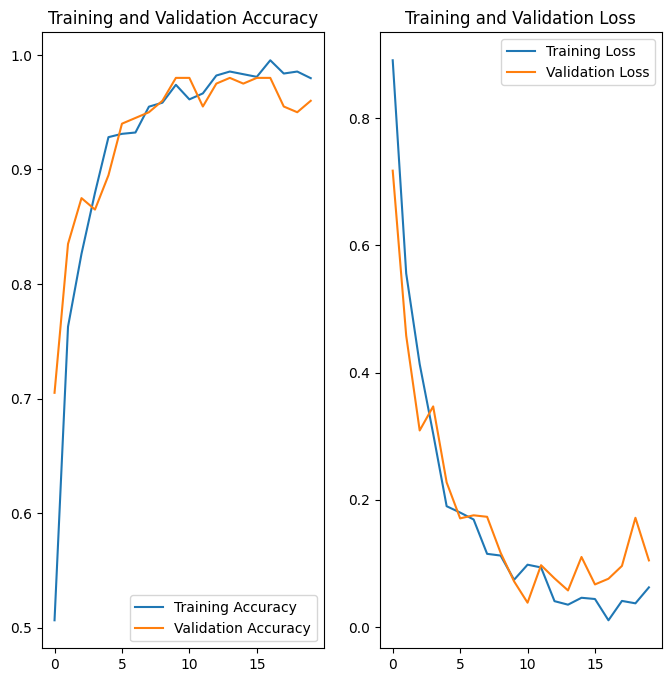

In [25]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(20), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), history.history['loss'], label='Training Loss')
plt.plot(range(20), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 270ms/step
predicted label: Potato___Late_blight


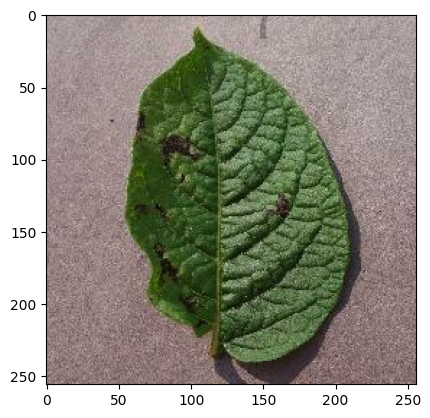

In [26]:
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",dataset.class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",dataset.class_names[np.argmax(batch_prediction[0])])

In [27]:
from keras.preprocessing import image
def predict(model, img):
    img_array = image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = dataset.class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


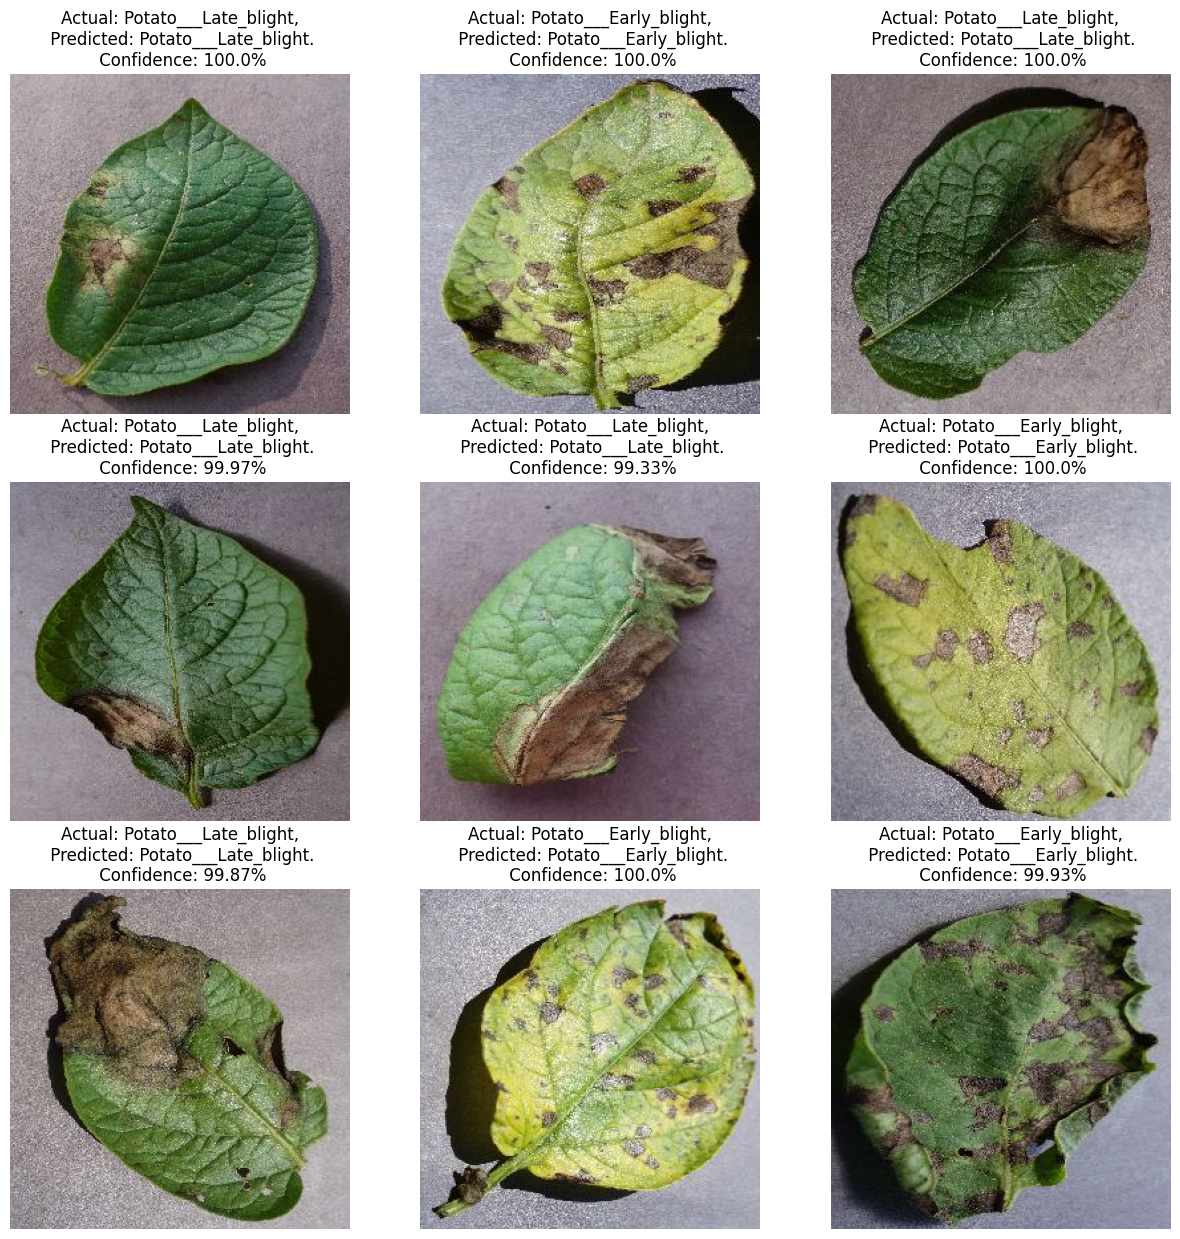

In [28]:

plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = dataset.class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model_version = 2
model.save("my_model.keras")
